### Description
This is a Python-version of movie clustering.  I used hierarchical clustering algorithm to group movies based on genre.  I also used PCA to visualize clusters in a 2-D scatterplot. I repeated the project in R in another notebook in the same folder.

### Movie Lens Dataset
Data from Movie Lens are used to cluster movies into different groups based on genre.

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster, cophenet

In [2]:
movies = pd.read_csv("dataset/movies.txt", header=None, sep="|")

In [3]:
movies.columns = ["ID","Title","ReleaseDate","VideoReleaseDate","IMDB","Unknown","Action","Adventure","Animation","Childrens",
              "Comedy","Crime","Documentary","Drama","Fantasy","FilmNoir","Horror","Musical","Mystery","Romance",
               "SciFi","Thriller","War","Western"]

In [4]:
movies.head()

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
movies.shape

(1682, 24)

In [6]:
X = movies.ix[:,5:]
X = X.as_matrix(columns=None)

In [7]:
PCA_set = PCA(n_components=2)
y = PCA_set.fit_transform(X)
y

array([[ 0.80601203, -0.41114332],
       [ 0.34030601,  1.30359494],
       [ 0.15882932,  0.60258733],
       ..., 
       [-0.62455358, -0.31059294],
       [ 0.69655897, -0.43907403],
       [-0.67125512, -0.15618468]])

In [8]:
Z = linkage(X, 'ward')

In [9]:
c, coph_dists = cophenet(Z, pdist(X))

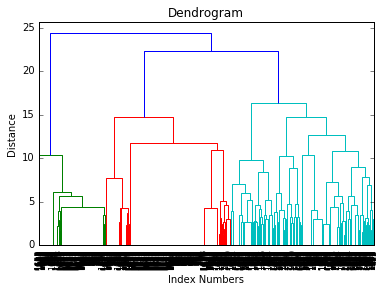

In [10]:
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

In [11]:
max_dist = 10
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([ 9,  7, 12, ...,  3,  2,  4])

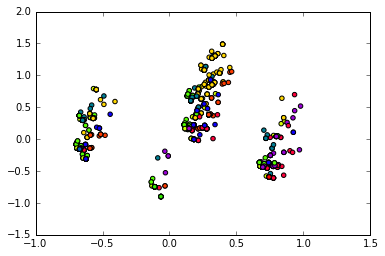

In [12]:
# graphed PCA using 20 features
plt.scatter(y[:,0], y[:,1], c=clusters, cmap='prism')